<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-02-25 21:12:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.9’

survey-data.csv.9   100%[===================>] 152.13M  61.6MB/s    in 2.5s    

2025-02-25 21:12:34 (61.6 MB/s) - ‘survey-data.csv.9’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [22]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]


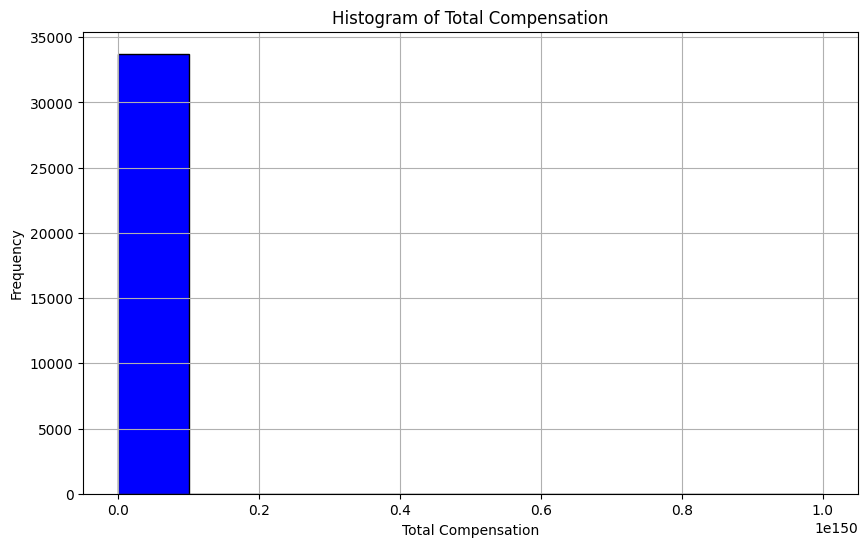

In [10]:
## Write your code here

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to fetch CompTotal data excluding NULL values
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comptotal = pd.read_sql_query(QUERY, conn)

# Show the result
print(df_comptotal)

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df_comptotal['CompTotal'], color='blue', edgecolor='black')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Box Plots**

Plot a box plot of Age.


                      Age
0      Under 18 years old
1         35-44 years old
2         45-54 years old
3         18-24 years old
4         18-24 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years old

[65437 rows x 1 columns]


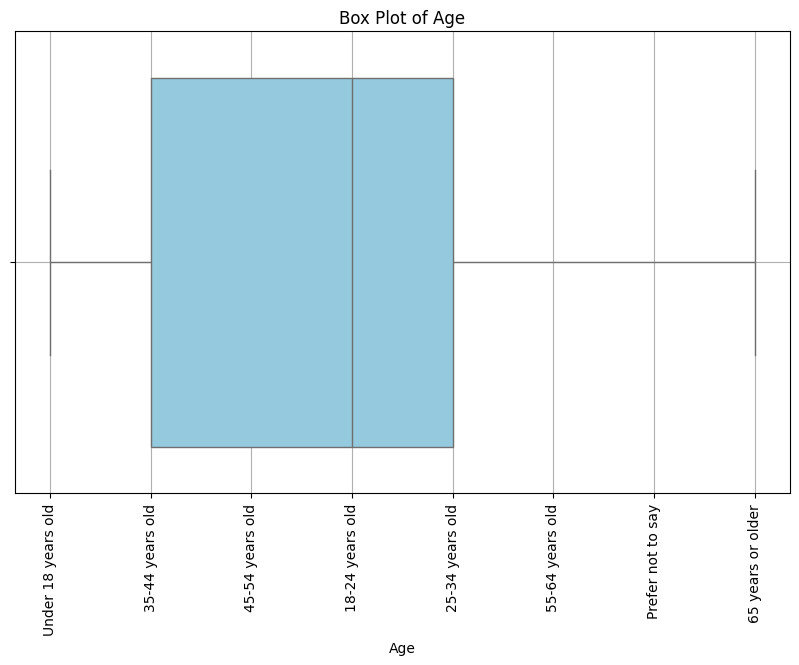

In [11]:
## Write your code here

# Query to fetch Age data excluding NULL values
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"

df_age = pd.read_sql_query(QUERY, conn)

# Show the result (optional, just to check)
print(df_age)

# Plot the box plot using seaborn
plt.figure(figsize=(10,6))
sns.boxplot(x=df_age['Age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


                   Age  WorkExp
0      35-44 years old     17.0
1      35-44 years old     15.0
2      35-44 years old     12.0
3      45-54 years old     29.0
4      25-34 years old     12.0
...                ...      ...
29653  25-34 years old     11.0
29654  25-34 years old      9.0
29655  25-34 years old      9.0
29656  35-44 years old     18.0
29657  18-24 years old      5.0

[29658 rows x 2 columns]


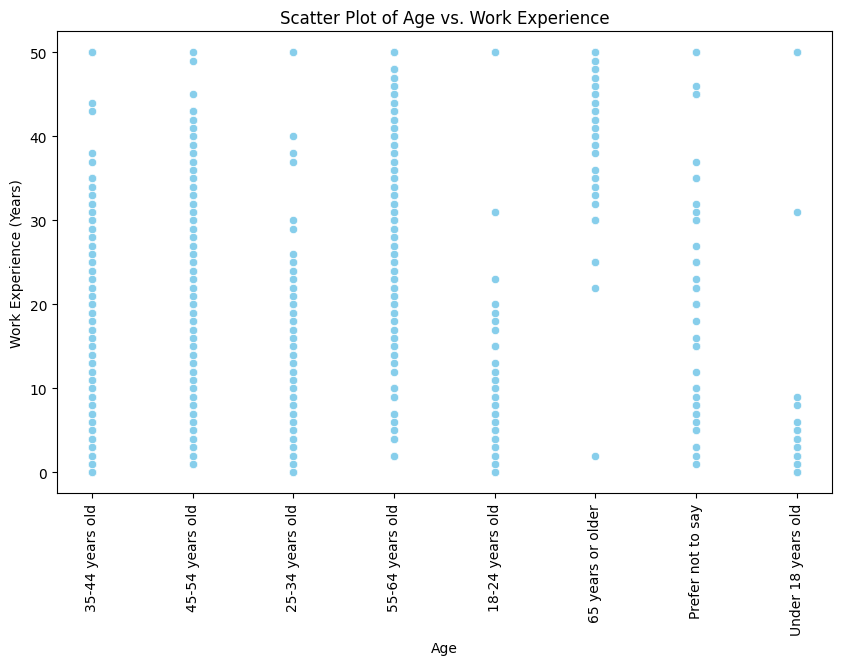

In [12]:
## Write your code here

# Query to fetch Age and WorkExp data excluding NULL values
QUERY = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df_data = pd.read_sql_query(QUERY, conn)

# Show the result (optional, just to check)
print(df_data)

# Plot the scatter plot using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_data, x='Age', y='WorkExp', color='skyblue')

# Customize the plot
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


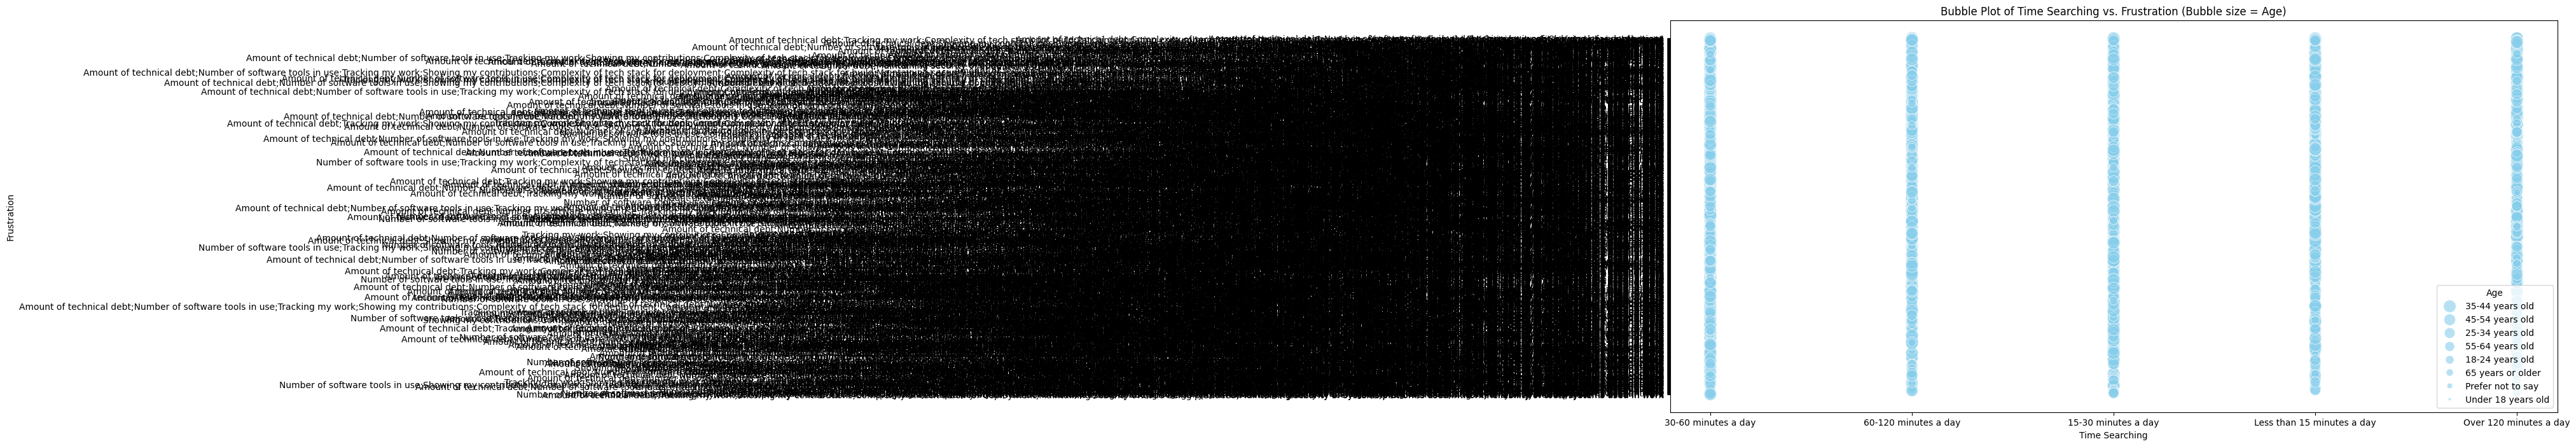

In [13]:
## Write your code here

# Query to fetch TimeSearching, Frustration, and Age data excluding NULL values
QUERY = "SELECT TimeSearching, Frustration, Age FROM main WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL"

df_data = pd.read_sql_query(QUERY, conn)

# Create a bubble plot using seaborn
plt.figure(figsize=(18,8))
sns.scatterplot(
    data=df_data,
    x='TimeSearching',
    y='Frustration',
    size='Age',
    sizes=(10, 200),
    alpha=0.6,
    color='skyblue',
)

plt.title('Bubble Plot of Time Searching vs. Frustration (Bubble size = Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')

plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


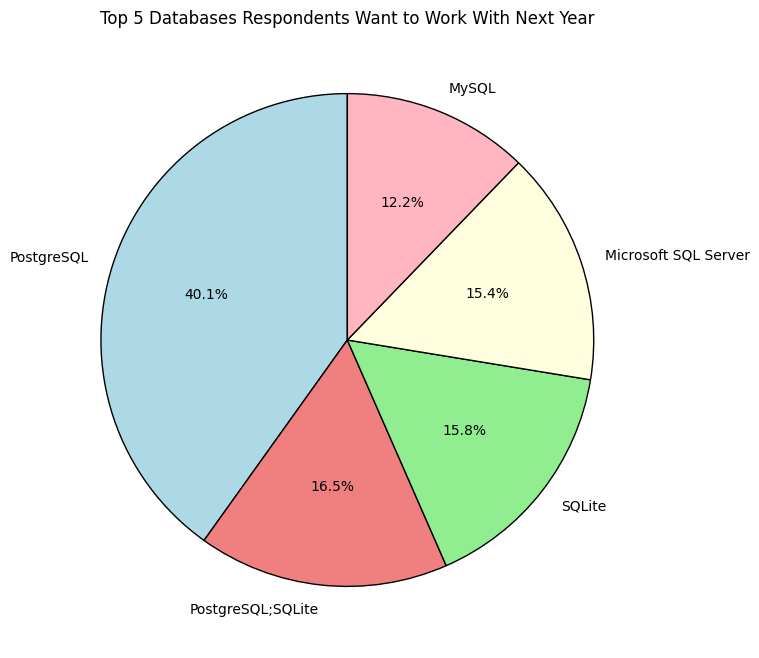

In [19]:
## Write your code here

# SQL Query to get the top 5 databases respondents want to work with
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5;
"""
df_databases = pd.read_sql_query(QUERY, conn)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df_databases['Count'],
    labels=df_databases['DatabaseWantToWorkWith'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')

# Display the pie chart
plt.show()

conn.close()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_463/2807194873.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)


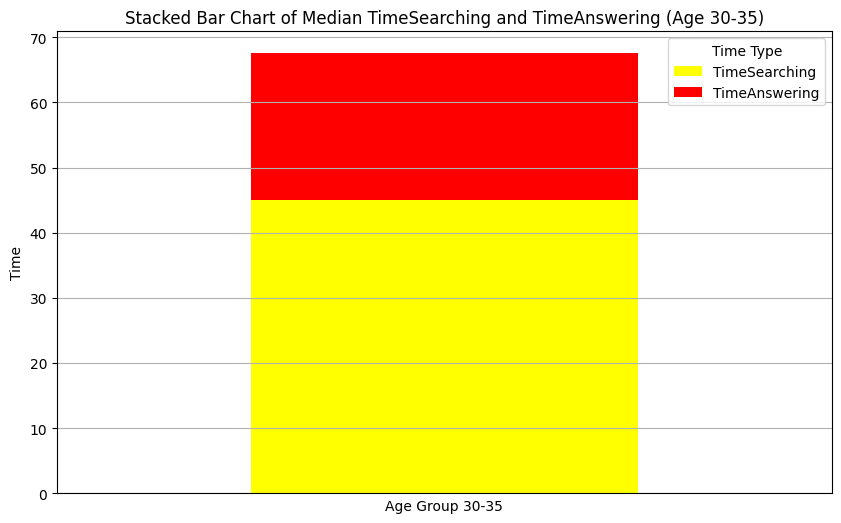

In [59]:
## Write your code here

# Load the data (replace this with your actual file path if needed)
df = pd.read_csv('survey-data.csv')

# Replace 'Prefer not to say' with NaN
df.replace('Prefer not to say', np.nan, inplace=True)

# Mapping for Age groups to their midpoints
mapping_age_group = {
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2
}

# Map the Age column to age groups
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Map the time categories to numeric values (minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,  # midpoint of <15 minutes
    '15-30 minutes a day': 22.5,  # midpoint of 15-30 minutes
    '30-60 minutes a day': 45,  # midpoint of 30-60 minutes
    '60-120 minutes a day': 90,  # midpoint of 60-120 minutes
    'Over 120 minutes a day': 150  # assumed midpoint for >120 minutes
}

# Replace the time category columns with numeric values
df['TimeSearching'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering'] = df['TimeAnswering'].map(time_mapping)

# Drop rows where TimeSearching or TimeAnswering is NaN after mapping
df.dropna(subset=['TimeSearching', 'TimeAnswering'], inplace=True)

# Replace NaN in AgeMapped with its mean value
df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)

# Filter the data for age group 30 to 35
df_age_group = df[(df['AgeMapped'] >= 30.0) & (df['AgeMapped'] <= 35.0)]

# Calculate the median for TimeSearching and TimeAnswering
median_time_searching = df_age_group['TimeSearching'].median()
median_time_answering = df_age_group['TimeAnswering'].median()

# Prepare the data for the stacked bar chart 
data = {
    'TimeSearching': median_time_searching,
    'TimeAnswering': median_time_answering
}

# Convert data into a DataFrame for plotting
df_median = pd.DataFrame([data])

# Plot the stacked bar chart
df_median.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellow', 'red'])

# Customize the plot
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering (Age 30-35)')
plt.xlabel('Age Group 30-35')
plt.ylabel('Time')
plt.legend(title="Time Type", labels=["TimeSearching", "TimeAnswering"])
plt.xticks([])  # Remove x-ticks as it's just one bar group
plt.grid(True, axis='y')

# Show the plot
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


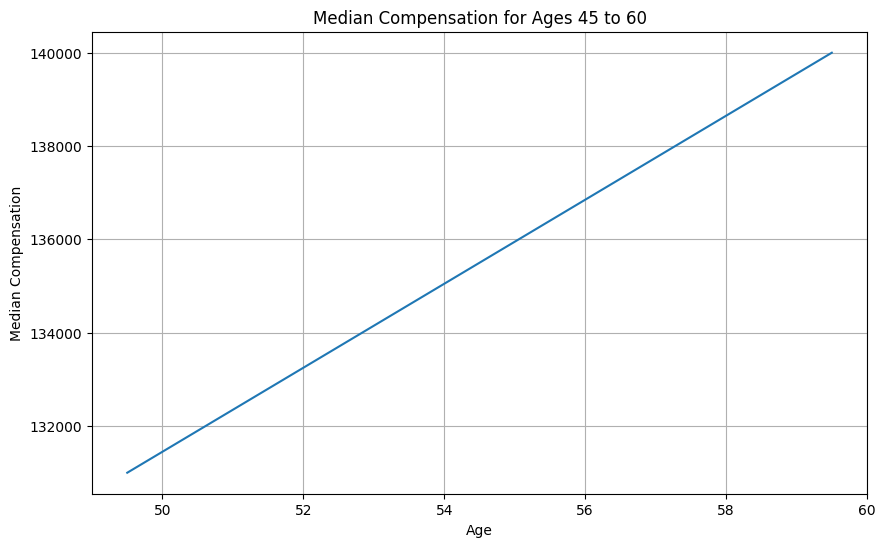

In [56]:
## Write your code here

# Mapping for Age groups to their midpoints
mapping_age_group2 = {
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2
}

# Map the Age column to age groups
df['AgeMapped2'] = df['Age'].map(mapping_age_group2)

# Filter the data for ages between 45 and 60
df_age_group2 = df[(df['AgeMapped2'] >= 45.0) & (df['AgeMapped2'] <= 60.0)]

# Calculate median compensation for each individual age
median_comp_by_age = df_age_group2.groupby('AgeMapped2')['CompTotal'].median()

# Plot the median compensation by age as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Median Compensation")
plt.title("Median Compensation for Ages 45 to 60")
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


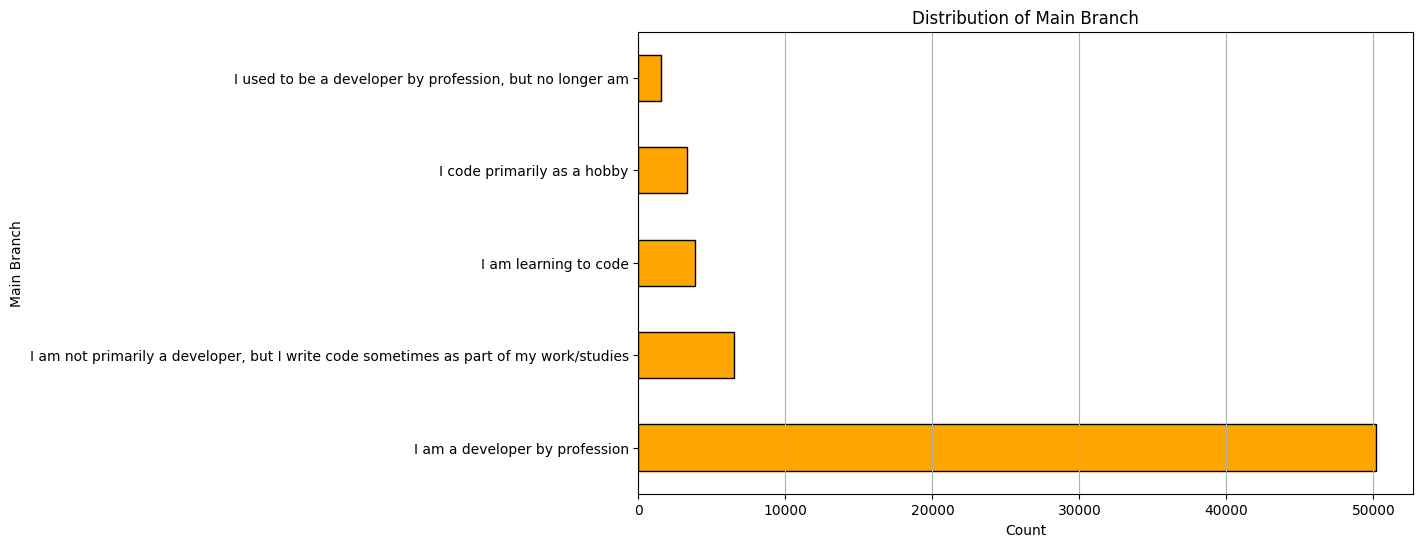

In [60]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query to fetch the MainBranch column
QUERY = "SELECT MainBranch FROM main"
df_mainbranch = pd.read_sql_query(QUERY, conn)

# Count occurrences of each category in the MainBranch column
mainbranch_counts = df_mainbranch['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind='barh', color='orange', edgecolor='black')

# Customize the plot
plt.title('Distribution of Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.grid(True, axis='x')

# Show the plot
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
